# Time Series Forcasting

## Fundamentals
- Library: [statsmodel.tsa]()
    - alternative: Alteryx
- Examples: [statsmodel Examples](http://www.statsmodels.org/dev/examples/index.html#stats)
- Methodology Map
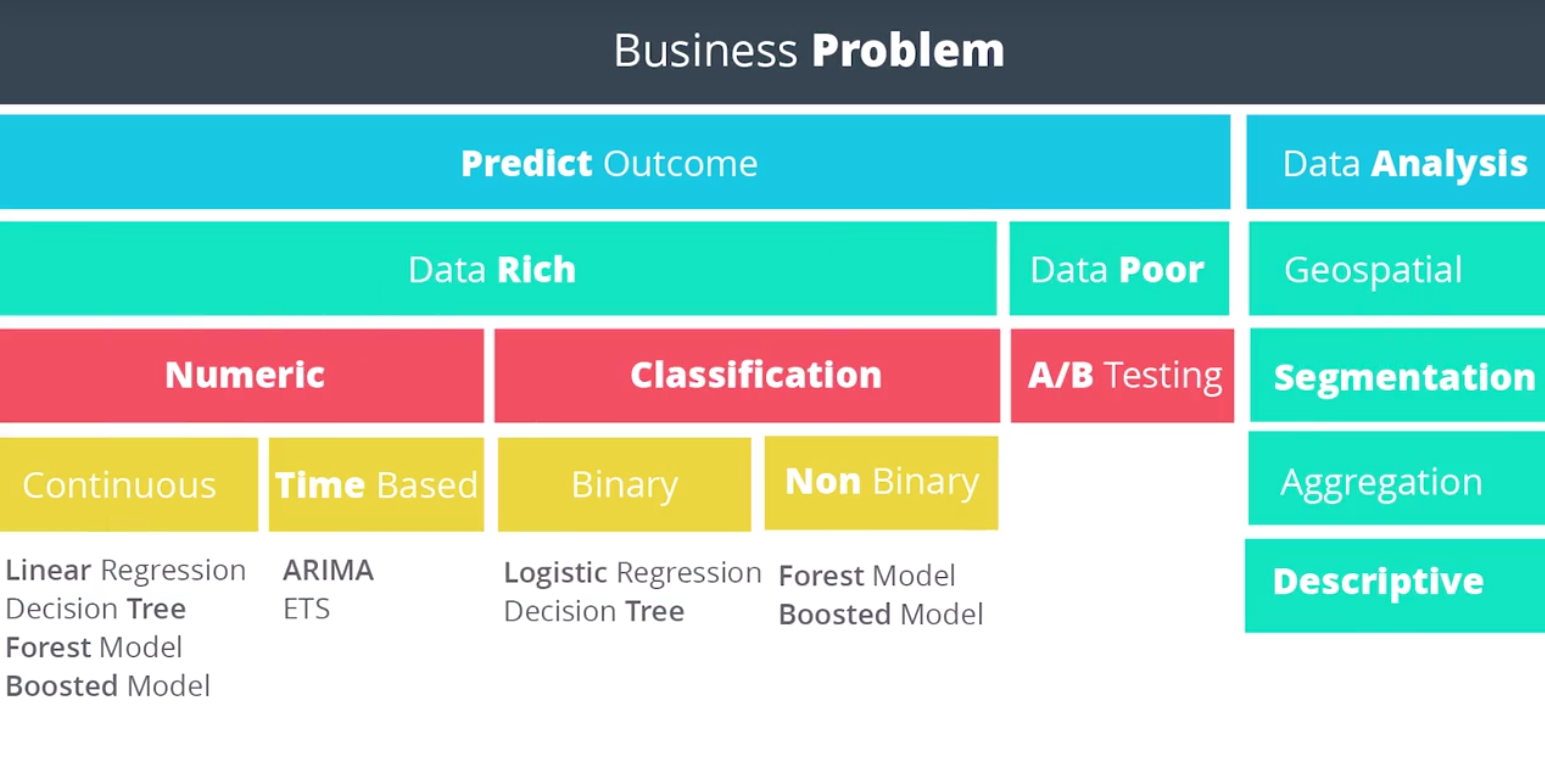

- Order Matters: there is a dependency on time and changing the order could change the meaning of the data
- identifying the pattern
- forcasting future values

- Methods
    - average
    - moving average
    - naive method: if there is not enough data to create a predictive model, the NM can supplement forecasts for the near future
    - ETS (exponential smoothing)
    - ARIMA
- Time Series Plot (components)
    - trend: uptrend, downtrend, horizontal trend
    - seasonality (fluctuation)
    - cyclical pattern (no repeating behavior)

## Exponential Smoothing
- Time Series = Error Trend Seasonality
- Time series decomposition plot
    - data (actual time series)
    - seasonal patterns
    - general tendencies
    - error
- additive: when the trend and seasonal variation are relatively constant over time -> linear behavior
- multiplicative: when the trend and seasonal variation increases or decreases in magnitude over time -> exponential behavior
- **smoothing parameter** $\alpha$: relative weights decreasing exponentially $w_t = \alpha(1-\alpha)^t$
    - $0\le \alpha \le 1$
    - $\alpha$ close to 1 -> more recent observations carry more weight or influence over the forecast
    - $\alpha$ close to 0 -> influence or weight of recent and older observations is more balanced
    - choosing $\alpha$:
        - use advanced statistical tools, e.g. Alteryx
        - test many $\alpha$ against each other to see which model best fits the data
    - advantage of ETS over simple moving averages: new data is depreciated at a constant rate, gradually declining in its impact
    - disadvantage of ETS: more sensitive to sudden large or small values
    
- **Simple Exponential Smoothing**
    - only suitable for time series **without trend and seasonality**
    - [math](https://otexts.com/fpp2/ses.html)
    
- **Double Exponential Smoothing (Holt's Linear Trend Method)** -> additive method for linear trend
    - level and trend
    - for non-seasonal dataset
    - exponential trend method (multiplicatively) -> forcasts with a trend growth rate by factoring rather than addition
    
- **Damped Trend Methods**
    - damping parameter: $\Phi$ -> small trend line changes slowly, fast trend line changes more rapidly
    
- **Holt-Winters Seasonal Method**
    - level, trend, seasonal components
    - additive: when seasonal fluctuation does not change in magnitude over time
    - multiplicative: when seasonal fluctuation changes in magnitude over time
    
- overview:
    - exponential trend: multiplicative model
    - increasing seasonality components: multiplicative model
    - error: constant or increasing
    - ETS() -> three components (Error, Trend, Seasonality): for each can be None, Multiplicative or Additive (N, M, A)
    
## ARIMA (Auto Regressive Integrated Moving Average)
### Non-seasonal
- denotation: ARIMA(p,d,q)
    - **Autoregressive Component**: p
    - **Moving Average Component**: q
    - **Integrated Component**: d (degree of differencing)
- stationary time series: mean, variance, correlation
- differencing: method of transforming a non-stationary time series to a stationary one (compute the differences between consecutive observations)
    - can help stabilise the mean of a time series by removing changes in the level, therfore eliminating or reducing trend and seasonality
    - the number of times of differencing needed to render the series stationary
    - best way to determine if series is sufficiently differenced -> plot the differenced series and check if there is a constant mean and variance
    - model:
        - random walk model: $y'_t = y_t - y_{t-1}$ => $y_t - y_{t-1} = \varepsilon_t$ => $y_t = y_{t-1} + \varepsilon_t + c$
        - second-order differencing: $y''_t= y'_t - y'_{t-1} = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) = y_t - 2y_{t-1} + y_{t-2}$
        
> after a time series has been stationarized by differencing, then fitting an ARIMA model to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series
    
- autocorrelation function plot (Correlogram)
    - autocorrelation: how correlated a time series is with its past values 
        - whether and to what degree autocorrelation exists
        - identifying non-stationary time series
            - significances of lag units gradually decay -> non-stationary series
            - significance after lag-k drop to zero relatively quickly -> stationary series
    - determine if AR or MA should be selected, how many lags to use
         - AR: Lag-1 positive autocorrelation
         - MA: Lag-1 negative autocorrelation
    - PACF: partial ACF
         - [definition](http://people.duke.edu/~rnau/411arim3.htm): the amount of correlation between a variable and a lag of itself that is not explained by correlations at all _lower-order-lags_
         - correlation at lag 1 propagates to lag 2 and presumably to higher-order-lags
         - partial correlation -> [conditional correlation](https://newonlinecourses.science.psu.edu/stat510/node/62/): 
> partial correlation between $y$ and $x_3$ is $\frac{\text{Convariance}(y,x_3|x_1,x_2)}{\sqrt{\text{Variance}(y|x_1, x_2)\text{Variance}(x_3|x_1,x_2)}}$, 
where $y$ is response, $x_1, x_2$ and $ x_3$ are predictor variables , taking into account how both $y$ and $x_3$ are correlated to $x_1, x_2$
    - if the partial autocorrelation drops off at lag #k -> generally indicates an AR(k) Model
    - if the partial autocorrelation drops off more gradually -> suggests a MA model
    - always review the ACF and PACF of differenced series when making judgements on how AR and MA terms to include
        
### Seasonal
- denotation: ARIMA(p,d,q)(P,D,Q)m
- stationalize time series:
    - non-seasonal differencing and seasonal differencing (Multi-Row Formula)
        - seasonal differencing (lag-m differences): difference between an observation and the previous observation from the same season $y'_t = y_t - y_{t-m}$

### Modelling process
- step 1: check stationarity
    - if a time series has a trend or seasonality component, it must be made stationary before using ARIMA to forecast
- step 2: difference
    - if a time series is not stationary, it needs to be stationarized through differencing
    - take as many differences as it takes and check for stationarity
    - check seasonal differencing as well
- step 3: filter out a validation sample
    - validate how accurate the model is (use the last 6 periods as the validation sample)
- step 4: select AR and MA terms
    - use the ACF and PACF to decide whether to include an AR term(s), MA term(s) or both
- step 5: build the model
    - set the number of periods to forecast the same size as validation sample
- step 6: validate model
    - compare the predicted values to the actuals in the validation sample
    
Tutorial: [A Guide to Time Series Forecasting with ARIMA in Python 3](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3)

## Analyzing and Visualizing Results
- Important Properties of the time series
    - patterns of variation in level of trend
    - effects of seasonality
    - removing autocorrelation
- Comparing Criteria
    - Residual Plots
    - Forecasting errors
    - Akaike Information Criteria
- Holdout Sample
- residual plots
    - residual uncorrelated
    - residual should have zero-mean, otherwise biased
        - adjusting by adding mean to forecasted values
        
- Interpreting Measures of Error
    - scale dependent errors
        - mean error (ME)
        - mean percentage error (MPE)
        > ME and MPE will help indicate whether the forecasts are biased to be disproportionately positive or negative
        - mean absolute error (MAE)
            - less sensitive to the occasional very large error (no square)
        - root mean squared error (RMSE) -> sample std of the differences b/t predicted and observed values
            - residual: when the calculations are performed over the data sample used for estimation
            - prediction errors: when computed out-of-sample
    - percentage errors: 
        - advantage: scale independent, can be used to compare forecasts between different data series
        - disadvantage: cannot be used when the series has zero values
        - Mean Absolute Percentage Error (MAPE)
    - scale-free errors
        - better than percentage errors
        - Mean Absolute Scaled Error (MASE) -> below 1.0 threshold for considering the model effective
            - applicable only to time series data
            - defined as the mean absolute error of the model divided by the mean absolute value of the first difference of the series
            - measures the relative reduction in error compared across other models for the same series
    - AIC (Akaike Information Criterion)
        - a measure of the relative quality of a statistical model
        - tradeoff of the **Goodness of fit** and **Complexity**
        - lower = better
        - [use AIC to test ARIMA models](https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/)
    - Confidence Intervals
    

#### Prepare the data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv('data/champagne_sales.csv')

In [3]:
index= pd.DatetimeIndex(start='2001-01', end='2009-01', freq='BM')

In [4]:
index

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-30', '2001-04-30',
               '2001-05-31', '2001-06-29', '2001-07-31', '2001-08-31',
               '2001-09-28', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-29', '2002-04-30',
               '2002-05-31', '2002-06-28', '2002-07-31', '2002-08-30',
               '2002-09-30', '2002-10-31', '2002-11-29', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-30', '2003-06-30', '2003-07-31', '2003-08-29',
               '2003-09-30', '2003-10-31', '2003-11-28', '2003-12-31',
               '2004-01-30', '2004-02-27', '2004-03-31', '2004-04-30',
               '2004-05-31', '2004-06-30', '2004-07-30', '2004-08-31',
               '2004-09-30', '2004-10-29', '2004-11-30', '2004-12-31',
               '2005-01-31', '2005-02-28', '2005-03-31', '2005-04-29',
               '2005-05-31', '2005-06-30', '2005-07-29', '2005-08-31',
      

In [5]:
sales.index=index
sales.head()

,Month,Champagne Sales
2001-01-31,1-01,2851
2001-02-28,1-02,2672
2001-03-30,1-03,2755
2001-04-30,1-04,2721
2001-05-31,1-05,2946


In [6]:
sales = sales.drop('Month', axis=1)

#### Time Series Decomposition Plot

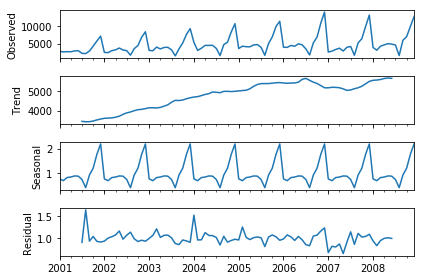

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(sales['Champagne Sales'], freq=12, model='multiplicative')
fig = res.plot()
fig.show()

#### Exponential Smoothing

,Additive
$\alpha$,1.550667e-01
$\beta$,9.257747e-28
$\phi$,NaN
$\gamma$,1.965700e-15
$l_0$,3.605942e+00
$b_0$,6.822181e-04
SSE,2.623647e+07


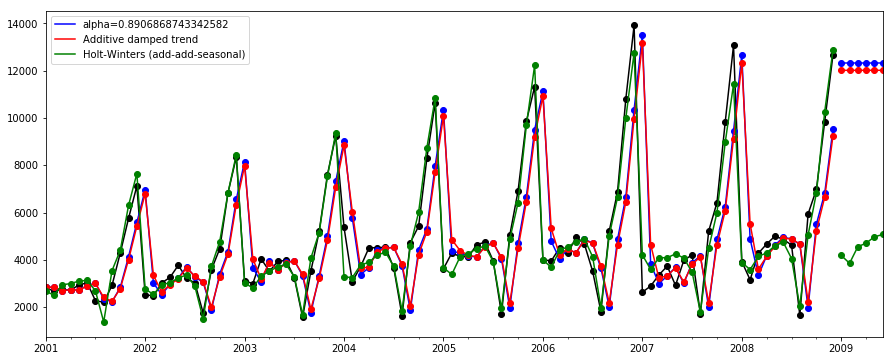

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
# simple exponential smoothing
fit1 = SimpleExpSmoothing(sales['Champagne Sales']).fit()
fcast1 = fit1.forecast(6).rename('alpha={}'.format(fit1.model.params['smoothing_level']))

# Holt's method (linear)
fit21 = Holt(sales['Champagne Sales'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast21 = fit21.forecast(6).rename('Additive damped trend')

# Holt's Winters method
fit3 = ExponentialSmoothing(sales['Champagne Sales'], seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
fcast3 = fit3.forecast(6).rename('Holt-Winters (add-add-seasonal)')
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Additive"]       = [fit3.params[p] for p in params] + [fit3.sse]

ax = sales['Champagne Sales'].plot(marker='o', color='black', figsize=(15,6))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast21.plot(marker='o', ax=ax, color='red', legend=True)
fit21.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
results

#### ARIMA

> A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, **time series with trends, or with seasonality, are not stationary** — the trend and seasonality will affect the value of the time series at different times. 

> A time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

> In general, a stationary time series will have no predictable patterns in the long-term. (aperiodic)

In [9]:
sales['d.cp_sales'] = sales['Champagne Sales'].diff()
sales['d2.cp_sales'] = sales['d.cp_sales'].diff()
sales['ln_cp_sales'] = np.log(sales['Champagne Sales'])
sales['d.ln_cp_sales'] = sales['ln_cp_sales'].diff()
sales['d2.ln_cp_sales'] = sales['d.ln_cp_sales'].diff()

In [10]:
sales.head()

,Champagne Sales,d.cp_sales,d2.cp_sales,ln_cp_sales,d.ln_cp_sales,d2.ln_cp_sales
2001-01-31,2851,NaN,NaN,7.955425,NaN,NaN
2001-02-28,2672,-179.0,NaN,7.890583,-0.064843,NaN
2001-03-30,2755,83.0,262.0,7.921173,0.030590,0.095433
2001-04-30,2721,-34.0,-117.0,7.908755,-0.012418,-0.043008
2001-05-31,2946,225.0,259.0,7.988204,0.079449,0.091867


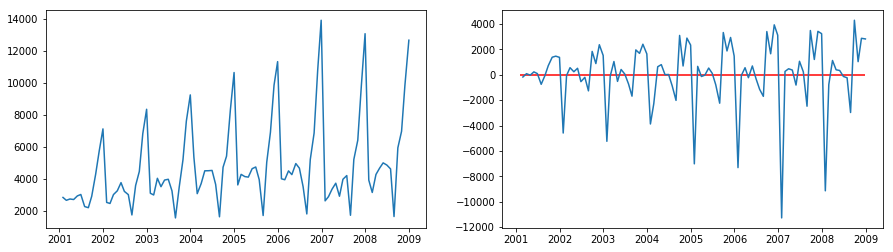

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
# levels
axes[0].plot(sales.index._mpl_repr(), sales['Champagne Sales'], '-')

# log difference
axes[1].plot(sales.index._mpl_repr(), sales['d.cp_sales'], '-')
axes[1].hlines(0, sales.index[0], sales.index[-1], 'r')

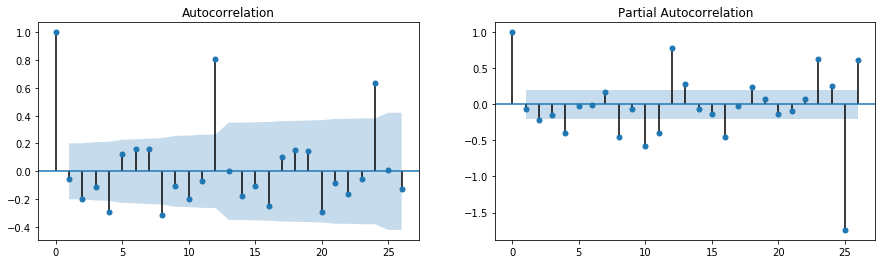

In [12]:
# ARIMA
from statsmodels.graphics.api import qqplot, tsa
# plot ACF, PACF
# double differenced
d = 1
col = 'd.cp_sales'
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121)
fig = tsa.plot_acf(sales.iloc[d:][col], lags=26, ax=ax1)
#fig = tsa.plot_acf(sales.iloc[d:]['d.ln_cp_sales'], lags=36, ax=ax1)
ax2 = fig.add_subplot(122)
fig = tsa.plot_pacf(sales.iloc[d:][col], lags=26, ax=ax2)
#fig = tsa.plot_pacf(sales.iloc[d:]['d.ln_cp_sales'], lags=36, ax=ax2)

In [13]:
# ARIMA(1,0,0)(1,1,0)12
m = sm.tsa.statespace.SARIMAX(sales.loc[:, 'Champagne Sales'], order=(1,0,0), seasonal_order=(1,1,0,12),
                             enforced_stationarity=False, enforced_invertibility=False)
res = m.fit()
res.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.3071,0.072,4.262,0.000,0.166,0.448
ar.S.L12,-0.1000,0.091,-1.094,0.274,-0.279,0.079
sigma2,6.476e+05,8.7e+04,7.443,0.000,4.77e+05,8.18e+05


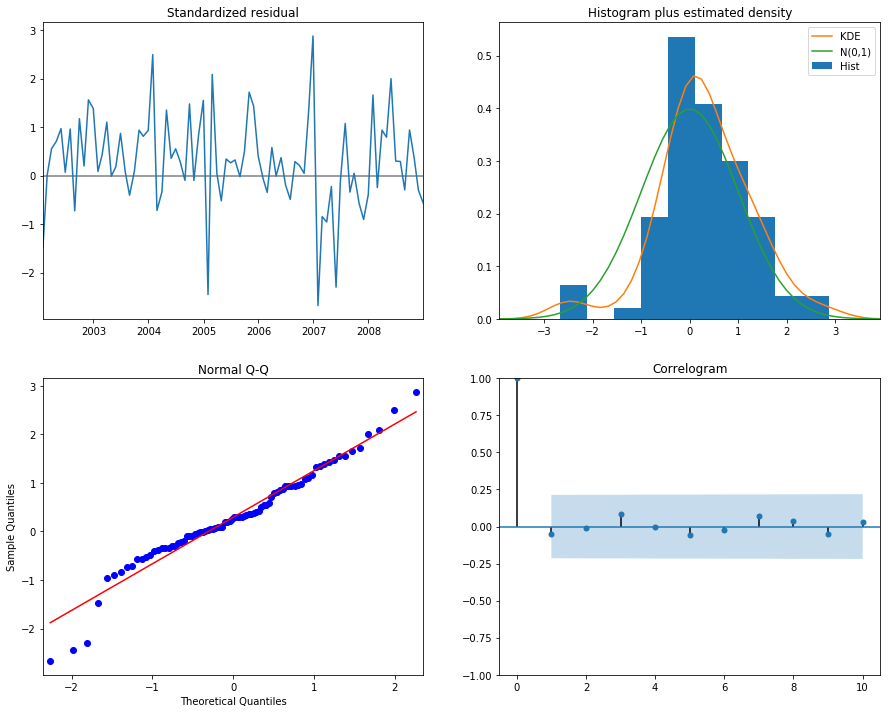

In [14]:
res.plot_diagnostics(figsize=(15,12))
plt.show()

> primary concern is to ensure that the residuals of the model are uncorrelated and normally distributed with zero-mean. if the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.
   - in the top right plot: check if the `KDE` line follows closely with the `N(0,1)` line, when so, the residuals are normally distributed.
   - Q-Q plot on the bottom left: the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with `N(0,1)` or not

#### Visualize results

In [15]:
pred = res.get_prediction(start=pd.to_datetime('2008-06-30'), dynamic=False)
pred_ci = pred.conf_int()

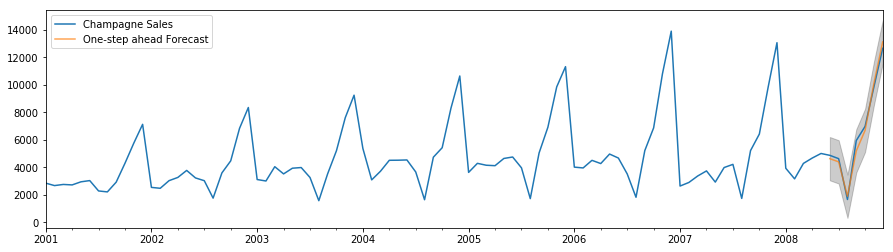

In [16]:
ax = sales.loc[:, ['Champagne Sales']].plot(label='observed', figsize=(15,4))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

In [17]:
forecasted = pred.predicted_mean
forecasted

2008-06-30     4632.186828
2008-07-31     4399.102816
2008-08-29     1895.390561
2008-09-30     5194.286269
2008-10-31     6693.088765
2008-11-28    10095.399540
2008-12-31    13133.256702
Freq: BM, dtype: float64